## **Machine Learning for Regression**

In [760]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### **1. Data Preparation**

In [761]:
df = pd.read_csv(r"D:\Work Documents\Data Analysis\Projects\MLZoomCamp - 2023\02-Regression\data.csv")

In [762]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [763]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [764]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [765]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

### **3. Explaratory Data Analysis**

In [766]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [767]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [768]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [769]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [770]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

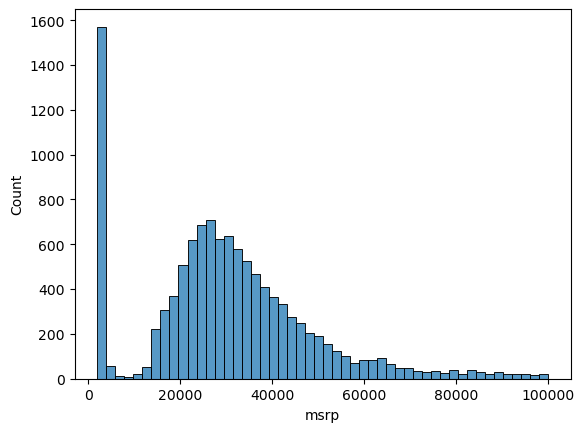

In [771]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [772]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

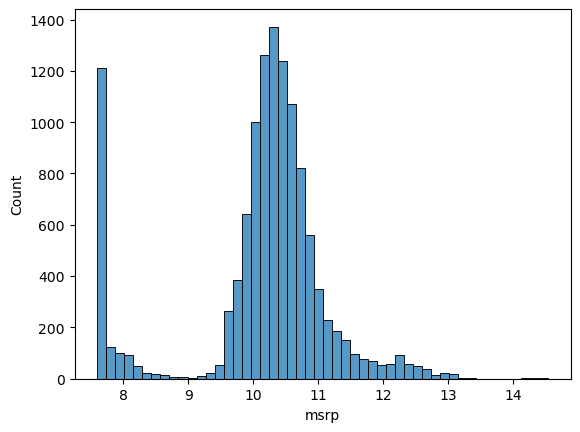

In [773]:
sns.histplot(price_logs, bins=50)

In [774]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### **4. Setting up the Validation Framework**

In [775]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [776]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [777]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [778]:
np.random.seed(13)
np.random.shuffle(idx)

In [779]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [780]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8684,lexus,rx_400h,2007,regular_unleaded,268.0,6.0,automatic,front_wheel_drive,4.0,"crossover,luxury,hybrid",midsize,4dr_suv,25,28,454,41180
1322,suzuki,aerio,2006,regular_unleaded,155.0,4.0,automatic,all_wheel_drive,4.0,NaN,compact,wagon,26,21,481,17099
11393,dodge,viper,2017,premium_unleaded_(required),645.0,10.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,19,12,1851,107995
675,pontiac,6000,1990,regular_unleaded,110.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,29,20,210,2000
1481,chevrolet,astro_cargo,2005,regular_unleaded,190.0,6.0,automatic,all_wheel_drive,3.0,NaN,large,cargo_minivan,18,14,1385,25430


In [781]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [782]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [783]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [784]:
df_train = df_train.drop(columns='msrp')
df_val = df_val.drop(columns='msrp')
df_test = df_test.drop(columns='msrp')

### **5. Linear Regression**

In [785]:
df_train.iloc[10]

make                                chevrolet
model                          silverado_1500
year                                     2017
engine_fuel_type     flex-fuel_(unleaded/e85)
engine_hp                               285.0
engine_cylinders                          6.0
transmission_type                   automatic
driven_wheels                rear_wheel_drive
number_of_doors                           2.0
market_category                     flex_fuel
vehicle_size                            large
vehicle_style              regular_cab_pickup
highway_mpg                                24
city_mpg                                   18
popularity                               1385
Name: 10, dtype: object

In [786]:
xi = [285, 11, 1385]

In [787]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [788]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [789]:
linear_regression(xi)

13.229999999999999

In [790]:
np.expm1(13.23)

556820.4995753616

In [791]:
np.log1p(556820.4995753616)

13.23

### **6. Linear Regression Vector Form**

In [792]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [793]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [794]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [795]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [796]:
linear_regression(xi)

13.229999999999999

In [797]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [798]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [799]:
def linear_regression(X):
    return X.dot(w_new)

In [800]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### **7. Training Linear Regresssion: Normal Equation**

In [801]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [802]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [803]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [804]:
train_linear_regression(X, y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

### **8. Car Price Baseline Model**

In [805]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [806]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,268.0,6.0,25,28,454
1,155.0,4.0,26,21,481
2,645.0,10.0,19,12,1851
3,110.0,4.0,29,20,210
4,190.0,6.0,18,14,1385
...,...,...,...,...,...
7145,158.0,4.0,32,24,1851
7146,195.0,4.0,23,18,535
7147,170.0,4.0,27,19,870
7148,190.0,6.0,18,14,1385


In [807]:
X_train = df_train[base].fillna(0).values

In [808]:
w0, w = train_linear_regression(X_train, y_train)

In [809]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

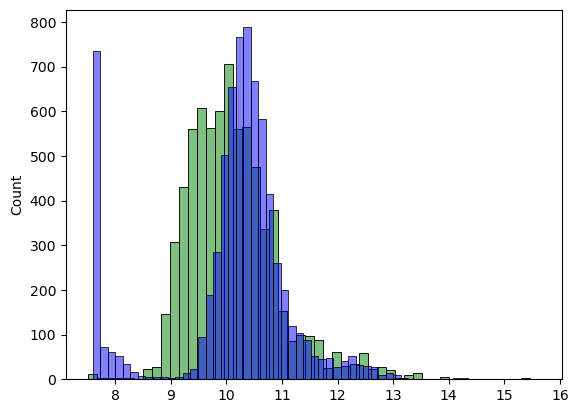

In [810]:
sns.histplot(y_pred, color='green', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### **9. RMSE**

In [811]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [812]:
rmse(y_train, y_pred)

0.756899521058046

### **10. Computing RMSE on Validation Data**

In [813]:
def prepare_X(df):
    df_num = df[base]
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [814]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [815]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [816]:
rmse(y_pred, y_val)

0.7617882534652419

### **11. Feature Engineering**

In [817]:
2017 - df_train.year

0       10
1       11
2        0
3       27
4       12
        ..
7145     5
7146    23
7147    13
7148    15
7149    22
Name: year, Length: 7150, dtype: int64

In [818]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age']

    df_num = df[features]
    df_num = df[features].fillna(0)
    X = df_num.values
    
    return X

In [819]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_pred, y_val)

0.5216442353160243

<Axes: ylabel='Count'>

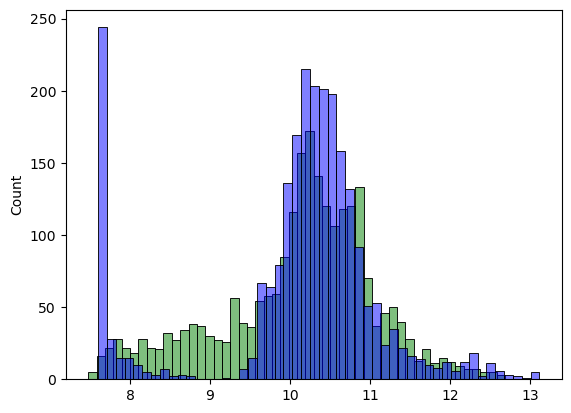

In [820]:
sns.histplot(y_pred, color='green', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

### **12. Categorical Variables**

In [821]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'
]

In [822]:
categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head(10).index)


In [823]:
categories

{'make': ['chevrolet',
  'ford',
  'volkswagen',
  'toyota',
  'dodge',
  'nissan',
  'gmc',
  'honda',
  'mazda',
  'cadillac'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel',
  'electric',
  'flex-fuel_(premium_unleaded_required/e85)',
  'flex-fuel_(premium_unleaded_recommended/e85)',
  'flex-fuel_(unleaded/natural_gas)',
  'natural_gas'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback',
  'performance',
  'crossover,luxury',
  'luxury,high-performance',
  'exotic,high-performance',
  'hatchback,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible'

In [824]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df['year']
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df['number_of_doors'] == v ).astype('int')
        features.append('num_doors_%s' % v)
        
    for name, values in categories.items():
        for v in values:
            df['%s_%s' % (name, v)] = (df[name] == v ).astype('int')
            features.append('%s_%s' % (name, v))

    df_num = df[features]
    df_num = df[features].fillna(0)
    X = df_num.values
    
    return X

In [825]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_pred, y_val)

620.2683172710514

In [826]:
w0, w

(-8.465749956122477e+16,
 array([-9.33020150e-01,  4.41528622e+01, -2.22030255e+00, -1.30814915e+01,
         6.86732415e-03, -1.22293486e+01, -2.15922347e+04, -2.15570117e+04,
        -2.15123548e+04,  1.44082417e+02,  1.21091216e+01,  1.23246415e+01,
         4.27716166e+01, -4.81046625e+01,  2.06927242e+01, -2.03474705e+01,
         2.43058067e+02, -1.12022381e+01,  4.55503337e+01, -1.96457385e+04,
        -1.95347871e+04, -1.96185450e+04, -1.96669271e+04, -1.98262820e+04,
         1.57469093e+04, -1.91607447e+04, -1.89725217e+04, -1.74303414e+04,
        -4.42143634e+04,  8.58164776e+16,  8.58164776e+16,  8.58164776e+16,
         8.58164776e+16,  8.58164776e+16, -1.15897807e+15, -1.15897807e+15,
        -1.15897807e+15, -1.15897807e+15,  2.10814243e+00, -1.03614200e+01,
         7.57029347e+00,  2.90096029e+01, -9.60178900e+00,  7.44204532e+00,
         4.12908935e+01,  2.20293609e+01, -1.43924623e+00, -2.90835310e+01,
        -2.90704591e+02, -3.88831443e+02, -3.78004086e+02, -2.7

### **13. Regularization**

In [827]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [828]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_pred, y_val)

0.45123805822814866

### **14. Tuning the Model**

In [829]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_pred, y_val)
    print(r, w0, score)

0.0 -8.465749956122477e+16 620.2683172710514
1e-05 6.19895235655712 0.4512413963179999
0.0001 6.198792370507156 0.4512413757140574
0.001 6.196537603677825 0.451241050027412
0.1 5.993331677321283 0.4512302385887415
1 5.286361711692015 0.4518410573914462
10 4.191349637677912 0.4628073633448721


In [840]:
r = 0.1

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_pred, y_val)

0.4512302385887415

### **15. Using the Model**

In [831]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,lexus,rx_400h,2007,regular_unleaded,268.0,6.0,automatic,front_wheel_drive,4.0,"crossover,luxury,hybrid",midsize,4dr_suv,25,28,454
1,suzuki,aerio,2006,regular_unleaded,155.0,4.0,automatic,all_wheel_drive,4.0,NaN,compact,wagon,26,21,481
2,dodge,viper,2017,premium_unleaded_(required),645.0,10.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,19,12,1851
3,pontiac,6000,1990,regular_unleaded,110.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,29,20,210
4,chevrolet,astro_cargo,2005,regular_unleaded,190.0,6.0,automatic,all_wheel_drive,3.0,NaN,large,cargo_minivan,18,14,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,lumina,1999,regular_unleaded,200.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,27,17,1385
9528,chrysler,sebring,2009,regular_unleaded,173.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,30,21,1013
9529,saab,9-5,2010,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,27,16,376
9530,toyota,tacoma,2015,regular_unleaded,159.0,4.0,automatic,rear_wheel_drive,4.0,NaN,compact,extended_cab_pickup,24,19,2031


In [832]:
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

In [841]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.1)

In [842]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_pred, y_test)
score

0.4406573555486452

In [835]:
car = df_test.iloc[13].to_dict()
car

{'make': 'nissan',
 'model': 'titan',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 317.0,
 'engine_cylinders': 8.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'flex_fuel',
 'vehicle_size': 'large',
 'vehicle_style': 'crew_cab_pickup',
 'highway_mpg': 18,
 'city_mpg': 13,
 'popularity': 2009}

In [836]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,nissan,titan,2015,regular_unleaded,317.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,18,13,2009


In [843]:
X_small = prepare_X(df_small)

y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]

In [844]:
np.expm1(y_pred)

43907.80435867986

In [845]:
np.expm1(y_test[13])

32060.000000000022

### **16. Next Steps**

- We included only 5 top features. What happens if we include 10?

Other projects
- Predict the price of a house - e.g. boston dataset
- https://archive.ics.uci.edu/ml/datasets.php?task=reg
- https://archive.ics.uci.edu/ml/datasets/Student+Performance

### **17. Summary**

- EDA - looking at data, finding missing values
- Target variable distribution - long tail => bell shaped curve
- Validation framework: train/val/test split (helped us detect problems)
- Normal equation - not magic, but math
- Implemented it with numpy
- RMSE to validate our model
- Feature engineering: age, categorical features
- Regularization to fight numerical instability